1. 사전 준비

 1.1. 아나콘다 다운로드 : https://www.anaconda.com/download에서 운영체제(win32, win62, macOS 등)에 맞는 파일을 다운로드
 1.2. 아나콘다 설치 : 설치시 'All Users' 옵션을 선택하고, Advanced Options는 두가지 옵션을 모두 선택
 1.3. 주피터 노트북 실행 : 윈도우의 경우 좌측 하단의 윈도우 시작 프로그램에서 Jupyter Notebook을 검색하거나, 
      명령어 프롬프트에서 'jupyter notebook'을 찾아서 웹 브라우저를 통해 실행(웹 브라우저는 구글 크롬을 추천)
 1.4. 접속시 'Password or token'을 입력하라는 메시가 나오면 별개의 cmd창에 있는 'token=' 뒷부분 내용을 입력
 1.5. 주피터 노트북의 우측 상단의 [New] 버튼을 클릭한 후, [Python3]를 실행

2. 주피터 노트북 단축키

 2.1. 코드 실행 : ctrl + Enter
 2.2. 셀 추가 : A 현재 위치 위(above)에 추가
              B 현재 위치 아래(bottom)에 추가
 2.3. 현재 셀 삭제 : DD
      셀 추가와 삭제는 셀 외곽의 초록 부분을 클릭한 뒤 진행할 것
 2.4. 코드라인 보기 : 메뉴바>View>Toggle Line Numbers

In [1]:
# 인스타그램 크롤링  1 - 인스타그램 로그인하기
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

# ① 크롬 브라우저 열기 : 
## 1) https://sites.google.com/a/chromium.org/chromedriver/downloads에서 크롬드라이버를 다운로드
## 2) 파이썬 실행시 다운로드한 파일이 위치한 경로를 webdriver.Chrome()에 ctrl + c,v
##    (ex.c드라이브의 Download 폴더에 다운로드한 경우 'c:\Download\chromedriver.exe'를 ctrl + c,v)

driver = webdriver.Chrome('/Users/bmdm/Documents/playwithdata/Chromedriver') 

# 인스타그램 접속후, 로그인 하기  - 
driver.get('https://www.instagram.com')
time.sleep(2)


######## 인스타 계정 로그인이 필요합니다 #########
email = '인스타계정입력해주세요'   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '인스타비번입력해주세요' ### 비번 정보 수정 필요
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

In [3]:
# 인스타 검색어 설정하기

def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/" + word
    return url

In [4]:
# selenium으로 URL 접속하기

word = "프라임에셋"
url = insta_searching(word)
driver.get(url)

In [5]:
# HTML에서 첫번째 게시글 찾아 클릭하기

def select_first(driver):
    first = driver.find_element_by_css_selector("div._9AhH0")
    first.click()
    time.sleep(3)
    
select_first(driver)

In [6]:
# 게시글 정보 가져오기
import re
from bs4 import BeautifulSoup

def get_content(driver):
    # ① 현재 페이지 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # ② 본문 내용 가져오기
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ' '
    # ③ 본문 내용에서 해시태그 가져오기(정규식 활용)
    tags = re.findall(r'#[^\s#,\\]+', content)  
    # ④ 작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    # ⑤ 아이디 가져오기
    name = soup.select('a.sqdOP.yWX7d._8A5w5.ZIAjV')[0].text
    # ⑥ 수집한 정보 저장하기
    data = [content, date, tags, name]
    return data

get_content(driver)

['#지방출장 ⠀내친구 하리보랑 함께 지방에상담일정 다녀올께용🤘⠀오늘두 화이팅 💜',
 '2020-06-08',
 ['#지방출장'],
 'ye___sol2']

In [7]:
# 다음 게시글 열기
def move_next(driver):

    right = driver.find_element_by_css_selector ('a.coreSpriteRightPaginationArrow')
    right.click()
    time.sleep(3)

move_next(driver)

In [8]:
# 인스타그램 크롤링  2 - 크롤링하기
# ① 인스타그램 검색페이지 URL 만들기
word = "프라임에셋"    #검색어
url = insta_searching(word)

# ② 검색페이지 접속하기
driver.get(url)
time.sleep(3)

# ③ 첫 번째 게시글 열기
select_first(driver)

# ④ 비어있는 변수(results)만들기
results = [ ]


# ⑤→⑥→⑦→⑧ 여러 게시물 수집하기
target = 7500      # 크롤링할 목표 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시(네트워크 문제 등의 이유로)  2초 대기 후, 다음 게시글로 넘어가도록 try, except 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    

print(results[:2])

[['#지방출장 ⠀내친구 하리보랑 함께 지방에상담일정 다녀올께용🤘⠀오늘두 화이팅 💜', '2020-06-08', ['#지방출장'], 'ye___sol2'], ['AM 5:40 출근하즈아~ 헬요일♡', '2020-06-07', [], 'shinsegae_ceo']]


In [9]:
# 판다스 라이브러리를 이용해 크롤링 결과 저장하기

import pandas as pd

results_df = pd.DataFrame(results)
results_df.columns = ['content', 'date', 'tags', 'name']
results_df

,content,date,tags,name
0,#지방출장 ⠀내친구 하리보랑 함께 지방에상담일정 다녀올께용🤘⠀오늘두 화이팅 💜,2020-06-08,[#지방출장],ye___sol2
1,AM 5:40 출근하즈아~ 헬요일♡,2020-06-07,[],shinsegae_ceo
2,점심은 꽃게장이닷~!,2020-06-08,[],shinsegae_ceo
3,⠀ ⠀⠀#퇴근⠀오늘 상담 마무리퇴근해봅시댜🙋🏻‍♀️⠀오늘도 수고하셨습니다🙏🏻⠀#오늘...,2020-06-08,"[#퇴근⠀오늘, #오늘도, #수고했어요⠀╸╸╸╸╸╸╸╸╸╸╸╸╸╸╸╸╸╸╸╸╸╸╸╸...",y_e__e___vely
4,날씨너무조으다੭╹▿╹)੭⁾⁾...#프라임에셋 #보험분석 #보험리모델링 #보험문의 #...,2020-05-21,"[#프라임에셋, #보험분석, #보험리모델링, #보험문의, #보험상담, #보험설계, ...",1455.k
...,...,...,...,...
7069,전에 다 읽었는지 아님 읽다 말았는지....내가 나이 들어 이런건지 아님 요즘 기분...,2020-04-19,"[#프라임에셋, #서천석의마음읽는시간, #위로, #성찰, #이영자띵언, #언제다읽지...",cyjkis
7070,#선물.항상 좋은것 챙겨주시는이재민SL님 고맙습니다❤️.속초 다녀오셨다고속초 최고의...,2020-04-19,"[#선물.항상, #GA이직, #보험대리점, #리치앤코, #라이브지점, #문용진지점장]",live_branch2018
7071,우리팀원 일순이형아들 지오생일👊👊.고생하셧고 축하합니당🎊🎊.....---------...,2020-04-19,[],_c.w.k
7072,"여유로움, 자연의소리와함께 아침을 걷는다꿈을 생각하고, 멋진 나를 돌아보는 이시간이...",2020-04-19,"[#보험, #보험설계사, #재무설계, #보장분석, #보험비교, #프라임에셋, #보험...",kim685005


In [10]:
# 결과값을 엑셀로 저장 (''에 저장할 경로를 입력)

results_df.to_excel('/Users/bmdm/Desktop/200609_crawling_prime_revised.xlsx')

In [31]:
# 크롤링 결과 중 해시테그 데이터 불러오기
import pandas as pd
raw_total = pd.read_excel('/Users/bmdm/Desktop/200604_crawling_gakorea_revised.xlsx')
raw_total['tags'][:3]

0                                           ['#Ga코리아']
1                     ['#영업직의비애', '#혼밥스타그램', '#Ga코리아']
2    ['#친구중에', '#조만간자산관리를맡길울친구', '#1등당첨된사람손잡고싶다면', ...
Name: tags, dtype: object

In [32]:
# 해시태그를 통합 저장
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [33]:
# 빈도수 집계
from collections import Counter
tag_counts = Counter(tags_total)

In [34]:
# 가장 많이 사용된 해시태그 확인
tag_counts.most_common(200)

[('#GA코리아', 412),
 ('#프라임에셋', 365),
 ('#피플라이프', 301),
 ('#리치앤코', 228),
 ('#삼성화재', 224),
 ('#ga코리아', 223),
 ('#메리츠화재', 222),
 ('#삼성생명', 201),
 ('#한화생명', 140),
 ('#인카금융서비스', 132),
 ('#메트라이프', 128),
 ('#보험설계사', 126),
 ('#현대해상', 122),
 ('#글로벌금융', 116),
 ('#오렌지라이프', 115),
 ('#입사문의', 111),
 ('#DB영업', 108),
 ('#재무설계사', 106),
 ('#리더스금융', 105),
 ('', 101),
 ('#생명보험', 99),
 ('#손해보험', 95),
 ('#동양생명', 94),
 ('#w에셋', 91),
 ('#1인GA', 90),
 ('#이지스DB', 84),
 ('#33본부', 83),
 ('#M금융', 83),
 ('#kb손해보험', 83),
 ('#흥국화재', 83),
 ('#DB생명', 79),
 ('#메가리치', 79),
 ('#병원인하우스영업', 78),
 ('#재무설계', 78),
 ('#미라클모닝', 72),
 ('#흥국생명', 69),
 ('#인카금융', 67),
 ('#동부화재', 67),
 ('#메리츠', 61),
 ('#리치엔코', 60),
 ('#엠금융서비스', 60),
 ('#한화손해보험', 59),
 ('#KB손보', 59),
 ('#메가', 57),
 ('#이직문의', 57),
 ('#에이플러스에셋', 56),
 ('#글로벌', 56),
 ('#아침명언', 56),
 ('#보험클리닉', 54),
 ('#인카', 52),
 ('#리더스', 51),
 ('#보험', 51),
 ('#롯데손보', 51),
 ('#보험왕', 51),
 ('#kb생명', 51),
 ('#W에셋', 50),
 ('#질병예측AI영업', 49),
 ('#벨류마크', 49),
 ('#에즈금융서비스', 47),
 ('#동부생명', 47),


In [85]:
# 데이터 정제 : 관련성 낮은 키워드 정제 - 영업활동 관련 키워드를 수집하기 위해 보험회사명이나 일반명사는 STOPWORD로 설정
STOPWORDS = ['#보험', 
 '#보험설계사',  
 '#오렌지라이프', 
 '#메리츠화재', 
 '#일상', 
 '#입사문의', 
 '#재무설계사', 
 '#메트라이프', 
 '#맞팔', 
 '#운전자보험', 
 '#선팔', 
 '#보험상담', 
 '#현대해상', 
 '#삼성생명', 
 '#삼성화재', 
 '#손해보험', 
 '#보험문의', 
 '#증권분석', 
 '#생명보험', 
 '#소통', 
 '#GA', 
 '#데일리', 
 '#재무설계', 
 '#코로나', 
 '#자동차보험', 
 '#보험대리점', 
 '#천안', 
 '#구인', 
 '#구직', 
 '#좋아요', 
 '#한화생명', 
 '#영업', 
 '#입사', 
 '#출근', 
 '#이직', 
 '#선팔하면맞팔',
 '#상담', 
 '#재테크',  
 '#보험금청구', 
 '#보상전문가', 
 '#푸르덴셜', 
 '#건강보험', 
 '#퇴근', 
 '#가족', 
 '#보상', 
 '#창원', 
 '#맛스타그램', 
 '#DB손해',
 '#김비서', 
 '#품격있는', 
 '#재테크⠀💲진실을',
 '#보험청구', 
 '#인재채용', 
 '#보험영업', 
 '#저축', 
 '#야근', 
 '#신한생명',
 '#열정', 
 '#한화손해보험'
 '#시작', 
 '#성실', 
 '#대전', 
 '#보험의달인',
 '#보상의달인',
 '#새벽', 
 '#동양생명', 
 '#DB손해보험',
 '#daily'
 '#진해',
 '#만근',
 '',
 '#한화손해보험', 
 '#시작', 
 '#daily', 
 '#진해', 
 '#마산', 
 '#팔로우', 
 '#김해', 
 '#출퇴근', 
 '#셀카', 
 '#김예진팀장⠀⠀∙', 
 '#보험클리닉', 
 '#추천', 
 '#건강', 
 '#30대', 
 '#원수사', 
 '#교보생명', 
 '#이지스', 
 '#흥국생명', 
 '#KB손해보험', 
 '#20대', 
 '#짠테크', 
 '#평택', 
 '#영업관리', 
 '#메리츠', 
 '#영업직', 
 '#노래하는재무설계사박정철', 
 '#축가', 
 '#재무설계사',
 '#노래하는한라봉남', 
 '#이별상담', 
 '#나잖아', 
 '#한라봉남', 
 '#사회자', 
 '#채용', 
 '#광주', 
 '#서울', 
 '#미라클모닝', 
 '#메가리치', 
 '#노래스타그램', 
 '#KGA에셋', 
 '#화이팅', 
 '#AIA생명', 
 '#둔산동', 
 '#대구', 
 '#간호사', 
 '#첫줄', 
 '#일상', 
 '#오렌지라이프', 
 '#문의',
 '#홍대', 
 '#강남', 
 '#세종', 
 '#성공', 
 '#보험', 
 '#실비보험', 
 '#GROW지사', 
 '#워라밸', 
 '#육아맘', 
 '#당신의한걸음이세상을바꿉니다', 
 '#전역장교', 
 '#동행', 
 '#ootd', 
 '#메트라이프', 
 '#동성로', 
 '#욜로',
 '#instagood', 
 '#안산', 
 '#행복', 
 '#보험설계사', 
 '#이직문의', 
 '#신촌',
 '#병원인하우스영업',
 '#좋아요반사', 
 '#좋반',
 '#상담문의', 
 '#여행', 
 '#도시락',
 '#취업', 
 '#전국어디든지',
 '#미래에셋생명',
 '#사고합의', 
 '#무료상담',
 '#달려갑니다', 
 '#의정부', 
 '#힐링',
 '#입사문의______________________________________________________⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀”비록',
 '#BMC', 
 '#창원맛집',
 '#김비서', 
 '#품격있는',
 '#보험CEO', 
 '#본부장', 
 '#채용문의', 
 '#재테크⠀💲진실을', 
 '#instadaily',
 '#노력',
 '#마산맛집',
 '#김해맛집', 
 '#인친', 
 '#Repost', 
 '#진해맛집⠀보험상담',
 '#FC',
 '#ga',
 '#3GO', 
 '#구영인', 
 '#슈프림지점', 
 '#김예진팀장⠀⠀∙',
 '#212본부', 
 '#지사장', 
 '#인천', 
 '#champ', 
 '#디지털노마드', 
 '#성장', 
 '#DB손보', 
 '#보험인', 
 '#채용공고', 
 '#오렌지생명', 
 '#f4f', 
 '#박상희', 
 '#단무지보험', 
 '#아산', 
 '#새벽4시', 
 '#한주의시작은금요일', 
 '#데일리', 
 '#이륜차보험', 
 '#유상운송', 
 '#소통', 
 '#실손의료비', 
 '#주말', 
 '#KB손보', 
 '#저축보험', 
 '#lfl', 
 '#최고의팀⠀', 
 '#감사', 
 '#약관분석', 
 '#보험금', 
 '#사고처리', 
 '#법인영업', 
 '#메리츠화재', 
 '#primeasset', 
  '#자산관리사', 
 '#매트라이프', 
 '#이학수지점장', 
 '#보험다이어트', 
 '#일상스타그램', 
 '#IFA', 
 '#장성민이사님', 
 '#맞팔', 
 '#dailylook', 
 '#오산', 
 '#부동산', 
 '#수수료', 
 '#아침명언', 
 '#천안보험', 
 '#두정동', 
 '#맞팔환영', 
 '#금융', 
 '#비전', 
 '#ARDOR', 
 '#교육', 
 '#훈남', 
 '#전국', 
 '#외국어', 
 '#화재보험', 
 '#용이동', 
 '#진사리', 
 '#송탄', 
 '#미남', 
 '#자산관리', 
 '#kb손해보험', 
 '#5월', 
 '#고양이', 
 '#불금', 
 '#사랑', 
 '#입사설명회',   
 '#천안', 
 '#직장인', 
 '#138본부', 
 '#원주보험', 
 '#창원보험', 
 '#엠금융', 
 '#운전자보험', 
 '#컨설팅', 
 '#같이의가치', 
 '#insuaccompany', 
 '#follow', 
 '#주머니', 
 '#보장성보험', 
 '#성정동', 
 '#운전자', 
 '#인생', 
 '#리더스', 
 '#진심', 
 '#오늘', 
 '#인사채용', 
 '#CRM', 
 '#설계사', 
 '#신한금융', 
 '#전문가', 
 '#실비', 
 '#진정성', 
 '#윤현기지사장', 
 '#윤현기', 
 '#보험료', 
 '#고객관리', 
 '#롯데손보', 
 '#instasize',
 '#최고의팀⠀', 
 '#맞춤상담하는경미', 
 '#목돈', 
 '#명함', 
 '#강의', 
 '#계약', 
 '#개척', 
 '#마음', 
 '#생일', 
 '#4월', 
 '#인카금융서비스.“보험업법', 
 '#9box', 
 '#인친환영', 
 '#계약체결', 
 '#사람', 
 '#보험리모델링', 
 '#DB생명', 
 '#온라인영업', 
 '#인스타그램', 
 '#고객만족', 
 '#나인박스', 
 '#매거진', 
 '#모바일잡지', 
 '#잡지', 
 '#모바일명함', 
 '#단체카톡', 
 '#드라이브', 
 '#instalove', 
 '#instapic', 
 '#instafollow', 
 '#oott', 
 '#좋은글', 
 '#AIA', 
 '#독서',
 '#선팔환영', 
 '#사랑하는가족', 
 '#AZ', 
 '#사회적거리', 
 '#선팔', 
 '#수완지구',
 '#신입채용',
 '#몸',
 '#강원도보험',
 '#연금',
 '#33본부', 
 '#위더스지사', 
 '#강남사업단', 
 '#유튜버', 
 '#민식이법', 
 '#봄봄팀', 
 '#연금보험', 
 '#보험설계',
 '#상무지구',
 '#보장분석',
 '#억대연봉' ]

tag_total_selected =[]
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(70)

[('#프라임에셋', 4489),
 ('#리치앤코', 823),
 ('#피플라이프', 618),
 ('#프라임에셋', 474),
 ('#인카금융', 382),
 ('#보험리모델링', 368),
 ('#어린이보험', 333),
 ('#AZ금융', 325),
 ('#인카금융서비스', 324),
 ('#글로벌금융', 310),
 ('#치아보험', 308),
 ('#리더스금융', 307),
 ('#종신보험', 296),
 ('#암보험', 253),
 ('#종합보험', 223),
 ('#203본부', 217),
 ('#메가', 203),
 ('#az금융', 201),
 ('#W에셋', 201),
 ('#원금융서비스', 199),
 ('#에즈금융서비스', 199),
 ('#DB영업', 189),
 ('#1인GA', 186),
 ('#197본부', 180),
 ('#펫보험', 158),
 ('#태아보험', 148),
 ('#GA코리아', 136),
 ('#글로벌에셋', 130),
 ('#w에셋', 123),
 ('#M금융', 122),
 ('#증권리뷰', 111),
 ('#메가금융', 107),
 ('#리치앤코', 102),
 ('#40대', 96),
 ('#PA금융', 91),
 ('#진주보험', 90),
 ('#에이플러스에셋', 89),
 ('#az', 89),
 ('#225본부', 88),
 ('#코로나19', 86),
 ('#이지스DB', 86),
 ('#종신', 82),
 ('#비교분석', 81),
 ('#간병인보험', 81),
 ('#171본부', 81),
 ('#라온지사', 80),
 ('#유병자보험', 78),
 ('#리모델링', 75),
 ('#슈프림지점', 74),
 ('#성동사업단', 74),
 ('#인카', 71),
 ('#골드문팀', 70),
 ('#원금융', 67),
 ('#프라임지점', 64),
 ('#애즈금융', 58),
 ('#리치엔코', 56),
 ('#DB생산', 54),
 ('#엠금융서비스', 54),


In [86]:
# 시각화 라이브러리 임포트 및 글꼴 설정
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform in 'darwin':
    font_name = "AppleGothic"
    
rc('font',family = font_name)

In [87]:
# 데이터 준비
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(70))
tag_counts_df.columns = ['tags', 'counts']

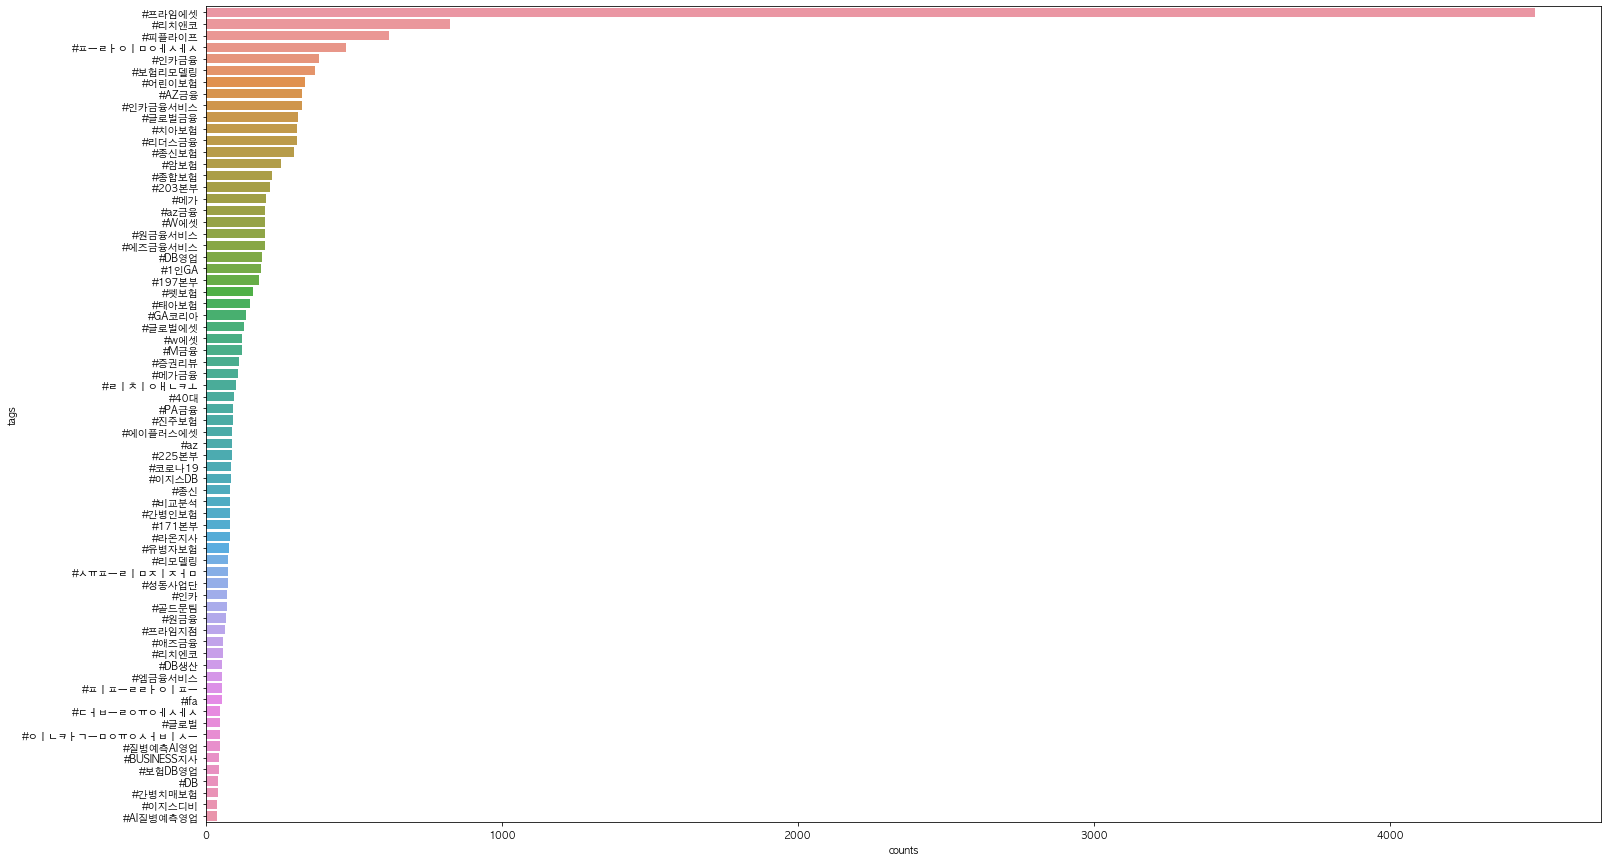

In [88]:
# 막대 차트 그리기
plt.figure(figsize =(25,15))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

In [86]:
# 워드클라우드 라이브러리 설치
!pip install wordcloud

     |████████████████████████████████| 160 kB 372 kB/s eta 0:00:01


In [89]:
# 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
elif platform.system() == 'Darwin': 
    font_path = 'Users/$USER/Library/Fonts/AppleGothic.ttf'

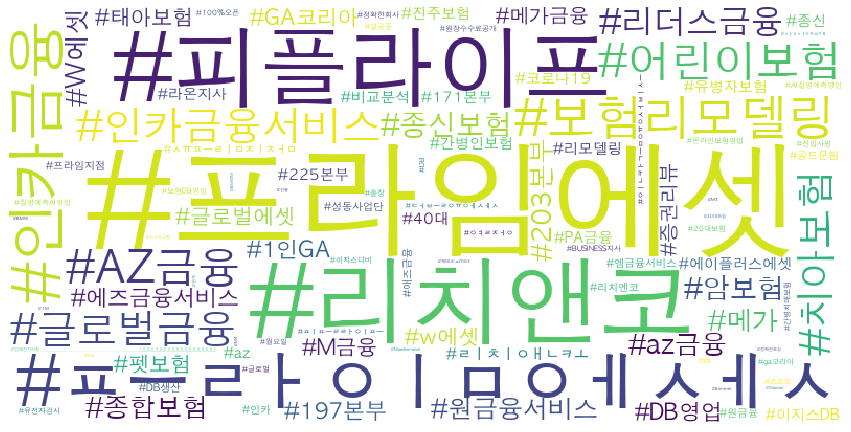

In [91]:
# 워드클라우드 만들기
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('/Users/bmdm/Desktop/3_6_tag-wordcloud.png')